In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
 

In [ ]:
# 定义下载数据的函数
def ReadAndSaveDataByPandas(target_url = None,file_save_path = None ,save=False):
    if target_url ==None:
        target_url = ("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv")   
    if file_save_path == None:
        file_save_path = "glass.csv"
    wine = pd.read_csv(target_url, header=0, sep=";")
    if save == True:
        wine.to_csv(file_save_path, index=False)
    return wine

wine = ReadAndSaveDataByPandas(file_save_path='wine.csv',save=True)
wine

In [2]:
# 从硬盘读取数据进入内存
wine = pd.read_csv("wine.csv")
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [14]:
wine = pd.DataFrame([[1988,2061,2335,2750,3356,3806],[386,408,422,482,511,561], [839,846,960,1258,1577,1893], [763,808,953,1010,1268,1352]])
wine.head()

,0,1,2,3,4,5
0,1988,2061,2335,2750,3356,3806
1,386,408,422,482,511,561
2,839,846,960,1258,1577,1893
3,763,808,953,1010,1268,1352


In [59]:
# 无量纲化
def dimensionlessProcessing(df):
    newDataFrame = pd.DataFrame(index=df.index)
    columns = df.columns.tolist()
    for c in columns:
        d = df[c]
        MAX = d.max()
        MIN = d.min()
        MEAN = d.mean()
        newDataFrame[c] = ((d - MEAN) / (MAX - MIN)).tolist()
    return newDataFrame

from sklearn.preprocessing import MinMaxScaler
def MMScaler(df):
    mm = MinMaxScaler()
    columns = df.columns
    indexs_train = df.index
    data=pd.DataFrame(mm.fit_transform(df),index=indexs_train, columns=columns) 
    
    return data


def GRA_ONE(gray, m=0):
    # 读取为df格式
    #gray = dimensionlessProcessing(gray)
    
    x_mean=gray.mean(axis=0)
    print(x_mean)
    for i in range(len(gray.columns)):
        gray.iloc[:,i] = gray.iloc[:,i]/x_mean[i]    
    #gray = MMScaler(gray)
    # 标准化
    std = gray.iloc[:, m]  # 为标准要素
    print(std)
    
    gray.drop(str(m),axis=1,inplace=True)
    ce = gray.iloc[:, 0:]  # 为比较要素
    print(ce)
    shape_n, shape_m = ce.shape[0], ce.shape[1]  # 计算行列

    # 与标准要素比较，相减
    a = zeros([shape_m, shape_n])
    
    for i in range(shape_m):
        for j in range(shape_n):
            a[i, j] = abs(ce.iloc[j, i] - std[j])

    # 取出矩阵中最大值与最小值
    #c, d = amax(a), amin(a)
    print(a)
    c, d = a.max().max(), a.min().min()
    print(c,d)

    # 计算值
    result = zeros([shape_m, shape_n])
    for i in range(shape_m):
        for j in range(shape_n):
            result[i, j] = (d + 0.5 * c) / (a[i, j] + 0.5 * c)

    # 求均值，得到灰色关联值,并返回
    result_list = [mean(result[i, :]) for i in range(shape_m)]
    #result_list.insert(m,1)
    return pd.DataFrame(result_list)


def GRA(DataFrame):
    df = DataFrame.copy()
    list_columns = [
        str(s) for s in range(len(df.columns)) if s not in [None]
    ]
    df_local = pd.DataFrame(columns=list_columns)
    df.columns=list_columns
    for i in range(len(df.columns)):
        df_local.iloc[:, i] = GRA_ONE(df, m=i)[0]
    return df_local


In [60]:
from numpy import *
import seaborn as sns

def ShowGRAHeatMap(DataFrame):
    colormap = plt.cm.RdBu
    ylabels = DataFrame.columns.values.tolist()
    f, ax = plt.subplots(figsize=(14, 14))
    ax.set_title('GRA HeatMap')
    
    # 设置展示一半，如果不需要注释掉mask即可
    mask = np.zeros_like(DataFrame)
    mask[np.triu_indices_from(mask)] = True
    
    with sns.axes_style("white"):
        sns.heatmap(DataFrame,
                    cmap="YlGnBu",
                    annot=True,
                    mask=mask,
                   )
    plt.show()

wine = pd.DataFrame([[1988,2061,2335,2750,3356,3806],[386,408,422,482,511,561], [839,846,960,1258,1577,1893], [763,808,953,1010,1268,1352]])
df = wine.iloc[:,:].T
#wine.head()
print(df)
list_columns = [
    str(s) for s in range(len(df.columns)) if s not in [None]
]
df_local = pd.DataFrame(columns=list_columns)
df.columns=list_columns
data_wine_gra = GRA_ONE(df, m=0)
#ShowGRAHeatMap(data_wine_gra)
data_wine_gra

      0    1     2     3
0  1988  386   839   763
1  2061  408   846   808
2  2335  422   960   953
3  2750  482  1258  1010
4  3356  511  1577  1268
5  3806  561  1893  1352
0    2716.000000
1     461.666667
2    1228.833333
3    1025.666667
dtype: float64
0    0.731959
1    0.758837
2    0.859720
3    1.012518
4    1.235641
5    1.401325
Name: 0, dtype: float64
          1         2         3
0  0.836101  0.682761  0.743906
1  0.883755  0.688458  0.787780
2  0.914079  0.781229  0.929152
3  1.044043  1.023735  0.984725
4  1.106859  1.283331  1.236269
5  1.215162  1.540486  1.318167
[[0.10414232 0.12491799 0.05435925 0.03152491 0.12878144 0.18616302]
 [0.04919734 0.07037864 0.07849137 0.01121684 0.04769042 0.13916008]
 [0.01194764 0.02894378 0.06943159 0.02779303 0.00062845 0.08315843]]
0.18616302377142002 0.0006284452608860125


,0
0,0.508432
1,0.624296
2,0.757300


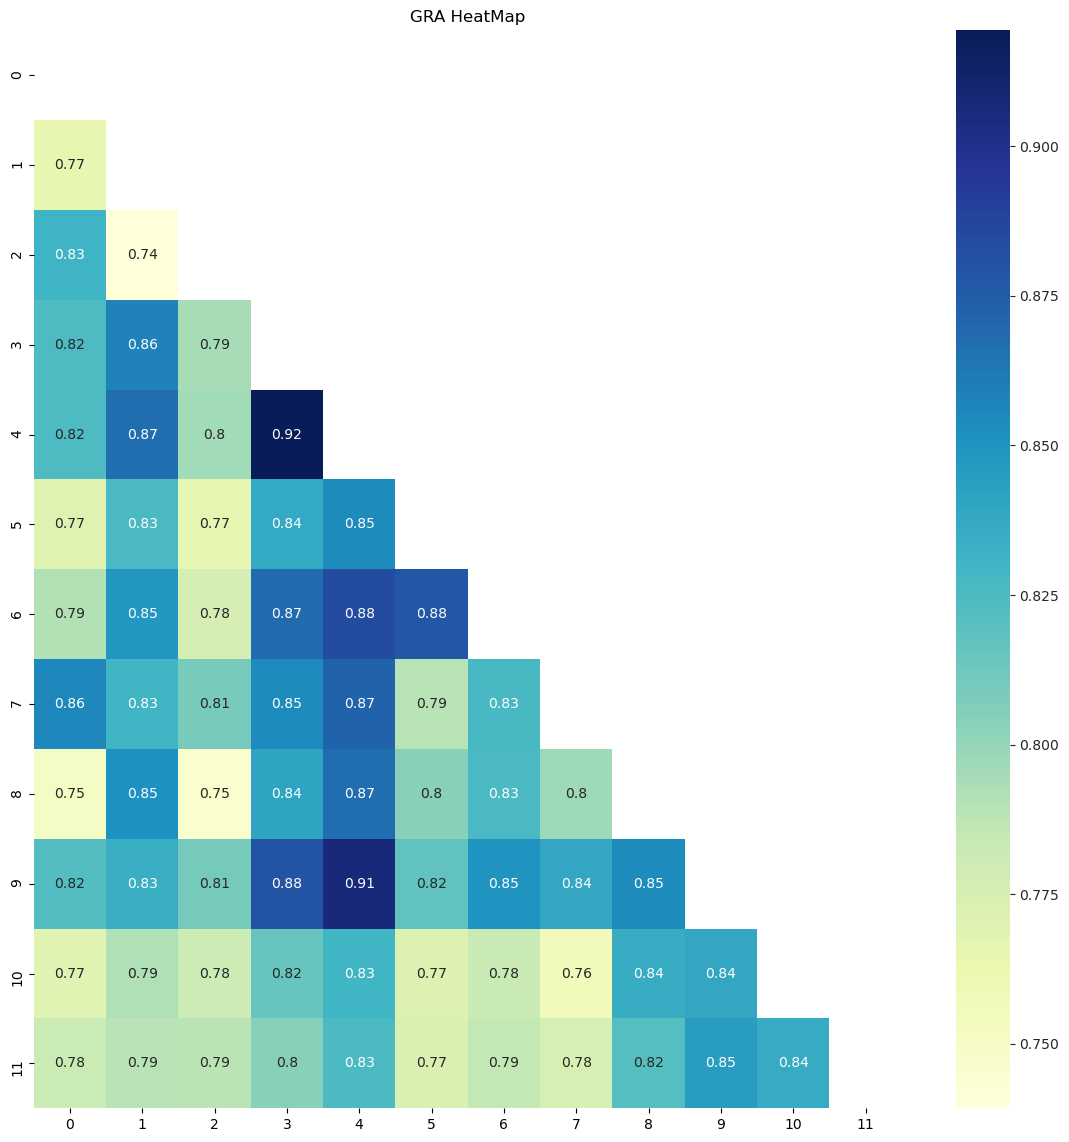

,0,1,2,3,4,5,6,7,8,9,10,11
0,1.000000,0.797338,0.848606,0.834680,0.856485,0.771742,0.804445,0.866226,0.792534,0.848224,0.781405,0.811607
1,0.765914,1.000000,0.729001,0.843650,0.873004,0.799388,0.834556,0.815033,0.858440,0.834594,0.772151,0.789429
2,0.830478,0.739233,1.000000,0.783976,0.812729,0.744378,0.768540,0.801981,0.765208,0.818265,0.770479,0.796946
3,0.824941,0.858308,0.794522,1.000000,0.930368,0.828444,0.869884,0.856226,0.861760,0.891200,0.815316,0.822204
4,0.824783,0.866911,0.795920,0.919391,1.000000,0.823352,0.867915,0.854191,0.867162,0.902720,0.804344,0.817785
5,0.770539,0.826189,0.767345,0.837225,0.854510,1.000000,0.886327,0.802133,0.837886,0.843206,0.782054,0.802625
6,0.790781,0.847764,0.776790,0.868068,0.884358,0.878042,1.000000,0.826921,0.846780,0.862525,0.780485,0.801496
7,0.855700,0.829385,0.809256,0.854202,0.872112,0.789406,0.826909,1.000000,0.820644,0.852416,0.753410,0.792117
8,0.751682,0.851797,0.746136,0.840533,0.867179,0.804148,0.826122,0.797579,1.000000,0.848358,0.810517,0.814287
9,0.822510,0.834044,0.809752,0.879408,0.907036,0.817837,0.849960,0.839089,0.854542,1.000000,0.821436,0.844837


In [4]:
# 灰色关联结果矩阵可视化
# 灰色关联结果矩阵可视化
from numpy import *
import seaborn as sns

def ShowGRAHeatMap(DataFrame):
    colormap = plt.cm.RdBu
    ylabels = DataFrame.columns.values.tolist()
    f, ax = plt.subplots(figsize=(14, 14))
    ax.set_title('GRA HeatMap')
    
    # 设置展示一半，如果不需要注释掉mask即可
    mask = np.zeros_like(DataFrame)
    mask[np.triu_indices_from(mask)] = True
    
    with sns.axes_style("white"):
        sns.heatmap(DataFrame,
                    cmap="YlGnBu",
                    annot=True,
                    mask=mask,
                   )
    plt.show()
    
data_wine_gra = GRA(wine)
ShowGRAHeatMap(data_wine_gra)
data_wine_gra

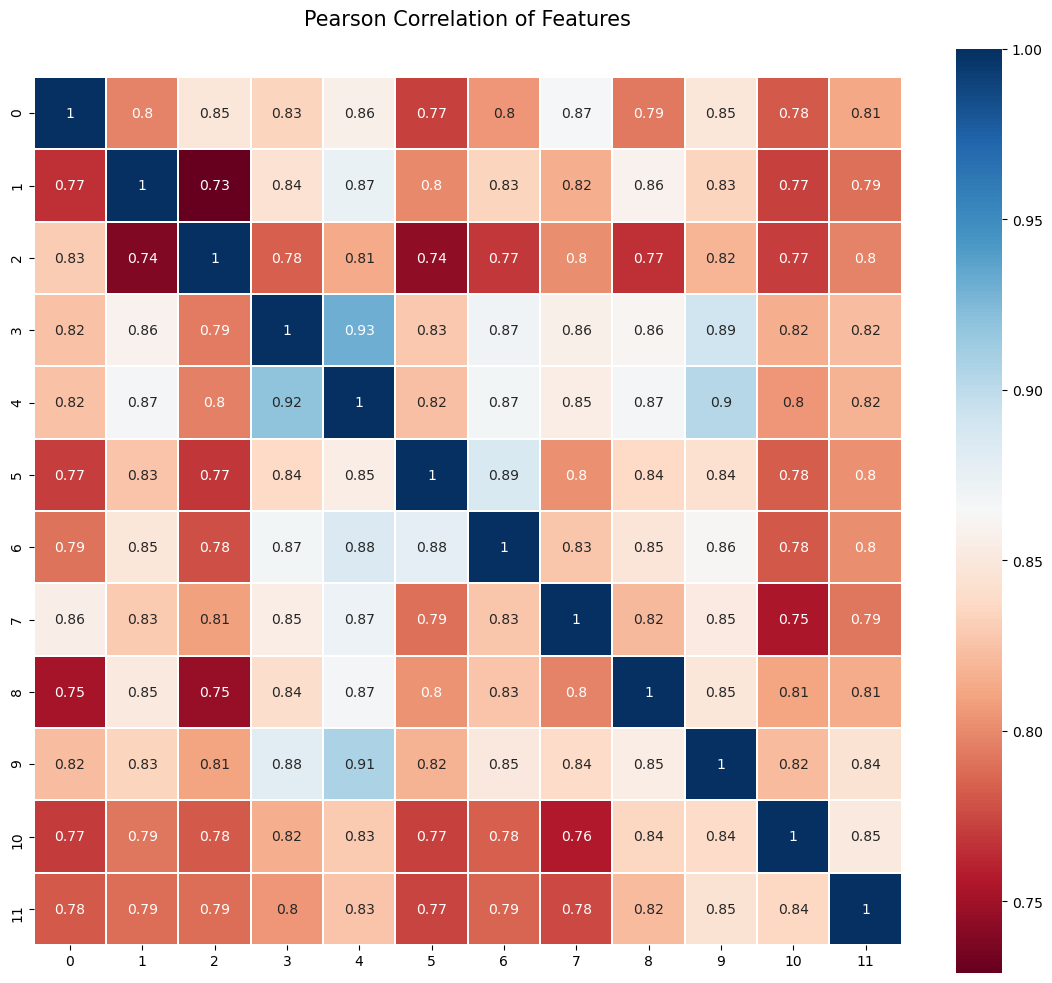

In [6]:
# 灰色关联结果矩阵可视化
import seaborn as sns
%matplotlib inline
def ShowGRAHeatMap(DataFrame):
    import matplotlib.pyplot as plt
    import seaborn as sns
    %matplotlib inline
    colormap = plt.cm.RdBu
    plt.figure(figsize=(14,12))
    plt.title('Pearson Correlation of Features', y=1.05, size=15)
    sns.heatmap(DataFrame.astype(float),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)
    plt.show()
ShowGRAHeatMap(data_wine_gra)

In [21]:
d0 = [[1,2,3,4,5],
      [10,20,30,40,50],
      [100,200,300,400,500]]

df0 = pd.DataFrame(d0, columns=['a','b','c','d','e'])
df0

,a,b,c,d,e
0,1,2,3,4,5
1,10,20,30,40,50
2,100,200,300,400,500


In [22]:
df0 = df0.T
df0

,0,1,2
a,1,10,100
b,2,20,200
c,3,30,300
d,4,40,400
e,5,50,500


In [24]:
nn = df0.columns
nn[0]

0

In [20]:
df0.drop(2,axis=1,inplace=True)
df0

,1
a,10
b,20
c,30
d,40
e,50


In [12]:
print(df1)

None


In [7]:
kk = df0.max(axis=1)
kk

0      5
1     50
2    500
dtype: int64

In [9]:
dd = df0.max(axis=1)
#dd = df0.max().max()
dd

500

In [7]:
d1 = np.max(dd)
d1

500

In [17]:
print(df0.iloc[1,:])
print(df0.iloc[2:4,:])



a    10
b    20
c    30
d    40
e    50
Name: 1, dtype: int64
     a    b    c    d    e
2  100  200  300  400  500


In [18]:
m1= df0.abs().max().max()
m1

500

In [22]:
m2= d0[1].max()
m2

AttributeError: 'list' object has no attribute 'max'

In [20]:
df0


,a,b,c,d,e
0,1,2,3,4,5
1,10,20,30,40,50
2,100,200,300,400,500


In [13]:

import pandas as pd
#x=pd.read_excel('data.xlsx')
#x=pd.read_csv("wine.csv")
x = pd.DataFrame([[1988,2061,2335,2750,3356,3806],[386,408,422,482,511,561], [839,846,960,1258,1577,1893], [763,808,953,1010,1268,1352]])
#x=x.iloc[:,:].T
print(x)

# 2、提取参考队列和比较队列
ck=x.iloc[0,:]
print(" 参考队列：", ck)
cp=x.iloc[1:,:]
print(" 参考队列：" ,cp)

# 1、数据均值化处理
x_mean=x.mean(axis=1)
for i in range(x.index.size):
    x.iloc[i,:] = x.iloc[i,:]/x_mean[i]

"""
# 1、数据差值化处理
x = (x - x.min())/(x.max() - x.min())
x=x.T


# 1、数据初值化处理
x_mean=x.mean(axis=1)
for i in range(x.index.size):
    x.iloc[i,:] = x.iloc[i,:]/x.iloc[i,0]
    
    
"""

# 2、提取参考队列和比较队列
ck=x.iloc[0,:]
print(" 参考队列：", ck)
cp=x.iloc[1:,:]
print(" 参考队列：" ,cp)


# 比较队列与参考队列相减
t=pd.DataFrame()
for j in range(cp.index.size):
    temp=pd.Series(cp.iloc[j,:]-ck)
    t=t.append(temp,ignore_index=True)

#求最大差和最小差
mmax=t.abs().max().max()
mmin=t.abs().min().min()
rho=0.5

#3、求关联系数
ksi=((mmin+rho*mmax)/(abs(t)+rho*mmax))


#4、求关联度
r=ksi.sum(axis=1)/ksi.columns.size

#5、关联度排序，得到结果
result=r.sort_values(ascending=False)

print(r)


      0     1     2     3     4     5
0  1988  2061  2335  2750  3356  3806
1   386   408   422   482   511   561
2   839   846   960  1258  1577  1893
3   763   808   953  1010  1268  1352
 参考队列： 0    1988
1    2061
2    2335
3    2750
4    3356
5    3806
Name: 0, dtype: int64
 参考队列：      0    1    2     3     4     5
1  386  408  422   482   511   561
2  839  846  960  1258  1577  1893
3  763  808  953  1010  1268  1352
 参考队列： 0    0.731959
1    0.758837
2    0.859720
3    1.012518
4    1.235641
5    1.401325
Name: 0, dtype: float64
 参考队列：           0         1         2         3         4         5
1  0.836101  0.883755  0.914079  1.044043  1.106859  1.215162
2  0.682761  0.688458  0.781229  1.023735  1.283331  1.540486
3  0.743906  0.787780  0.929152  0.984725  1.236269  1.318167
0    0.508432
1    0.624296
2    0.757300
dtype: float64


C:\Users\xiaoyw\AppData\Local\Temp\ipykernel_15588\612696797.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t=t.append(temp,ignore_index=True)
C:\Users\xiaoyw\AppData\Local\Temp\ipykernel_15588\612696797.py:44: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t=t.append(temp,ignore_index=True)


In [1]:
import pandas as pd
x = pd.DataFrame([[1988,2061,2335,2750,3356,3806],[386,408,422,482,511,561], [839,846,960,1258,1577,1893], [763,808,953,1010,1268,1352]])

# 1、数据均值化处理
x_mean=x.mean(axis=1)
print(x_mean)
for i in range(x.index.size):
    x.iloc[i,:] = x.iloc[i,:]/x_mean[i]
print(x)
# 2、提取参考队列和比较队列
ck=x.iloc[0,:]
cp=x.iloc[1:,:]
print(cp)
# 比较队列与参考队列相减
t=pd.DataFrame()
for j in range(cp.index.size):
    temp=pd.Series(cp.iloc[j,:]-ck)
    temp = temp.abs()
    t=t.append(temp,ignore_index=True)

print(t)
#求最大差和最小差
#mmax=t.abs().max().max()
#mmin=t.abs().min().min()
mmax=t.max().max()
mmin=t.min().min()
print('mmax',mmax)
print('mmin',mmin)
rho=0.5
#3、求关联系数
ksi=((mmin+rho*mmax)/(abs(t)+rho*mmax))
print(ksi)


#4、求关联度
r=ksi.sum(axis=1)/ksi.columns.size

#5、关联度排序，得到结果r3>r2>r1
result=r.sort_values(ascending=False)
print('result')
print(result)


0    2716.000000
1     461.666667
2    1228.833333
3    1025.666667
dtype: float64
          0         1         2         3         4         5
0  0.731959  0.758837  0.859720  1.012518  1.235641  1.401325
1  0.836101  0.883755  0.914079  1.044043  1.106859  1.215162
2  0.682761  0.688458  0.781229  1.023735  1.283331  1.540486
3  0.743906  0.787780  0.929152  0.984725  1.236269  1.318167
          0         1         2         3         4         5
1  0.836101  0.883755  0.914079  1.044043  1.106859  1.215162
2  0.682761  0.688458  0.781229  1.023735  1.283331  1.540486
3  0.743906  0.787780  0.929152  0.984725  1.236269  1.318167
          0         1         2         3         4         5
0  0.104142  0.124918  0.054359  0.031525  0.128781  0.186163
1  0.049197  0.070379  0.078491  0.011217  0.047690  0.139160
2  0.011948  0.028944  0.069432  0.027793  0.000628  0.083158
mmax 0.18616302377142002
mmin 0.0006284452608860125
          0         1         2         3         4        

C:\Users\xiaoyw\AppData\Local\Temp\ipykernel_4824\1736694141.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t=t.append(temp,ignore_index=True)
C:\Users\xiaoyw\AppData\Local\Temp\ipykernel_4824\1736694141.py:19: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  t=t.append(temp,ignore_index=True)
